In [ ]:
# https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a
#

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [2]:
# data generation
mod1 = lambda t: np.random.normal(10,3,t)

In [4]:
# population of 30.000 individual avg 10, scale=3
population = mod1(30000)

In [5]:
# Assume only able to obs 1.000 of these individuals
observation = population[np.random.randint(0, 30000, 1000)]

9.989050509034634

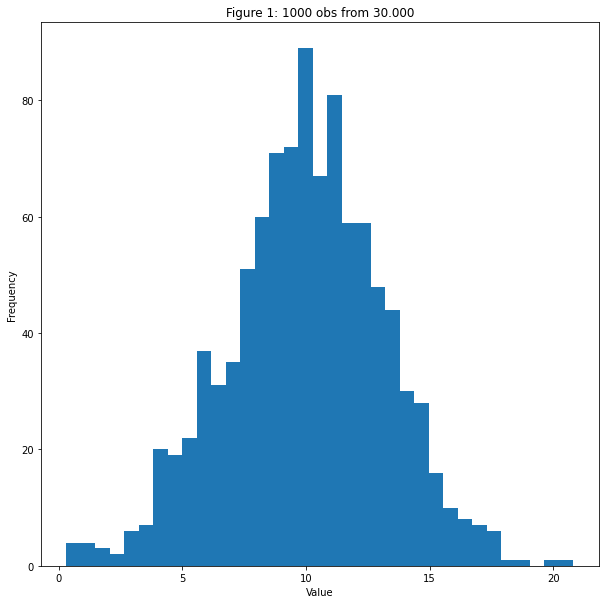

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(observation, bins=35,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: 1000 obs from 30.000")
mu_obs = observation.mean()
mu_obs

In [6]:
# transition model defines how to move from sigma current to sigma new
transition_model = lambda x: [x[0], np.random.normal(x[1], 0.5, (1,))[0]]

In [90]:
np.random.normal(0.1, 0.5, (1,))

array([-1.47754621])

In [7]:
def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <= 0): return 0
    return 1

In [1]:
#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def manual_log_like_normal(x, data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    # np.sum(-np.log(
    #     x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))
    return np.sum(-np.log( 
        x[1] * np.sqrt(2* np.pi)) -((data-x[0])**2) / (2*x[1]**2)
        )
    


In [9]:
#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x, data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0], x[1]).pdf(data)))

In [10]:
# accept or reject new sample
def acceptance (x, x_new):
    if x_new > x: return True
    else:
        accept = np.random.uniform(0, 1)
        return (accept < (np.exp(x_new - x)))

In [12]:
def metropolis_hastings(likelihood_computer, 
                        prior, 
                        transition_model, 
                        param_init,
                        iterations,
                        data,
                        acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample    
    x = param_init
    accepted = []
    rejected = []
    for i in range(iterations):
        x_new = transition_model(x)
        x_lik = likelihood_computer(x, data)
        x_new_lik = likelihood_computer(x_new, data)
        if(acceptance_rule(x_lik + 
                           np.log(prior(x)), 
                           x_new_lik + np.log(prior(x_new)))):
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)
    return np.array(accepted), np.array(rejected)

In [15]:
accepted, rejected = metropolis_hastings( manual_log_like_normal,
                                        prior,
                                        transition_model,
                                        [mu_obs, 0.1],
                                        50000,
                                        observation,
                                        acceptance)

<ipython-input-8-380f87ad2a10>:5: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))
<ipython-input-12-eef69ff7e60f>:23: RuntimeWarning: divide by zero encountered in log
  x_new_lik + np.log(prior(x_new)))):


In [16]:
len(accepted)

8820

In [ ]:
mu_obs

In [ ]:
accepted

In [17]:
a = accepted[:, 1]
r = rejected[:, 1]

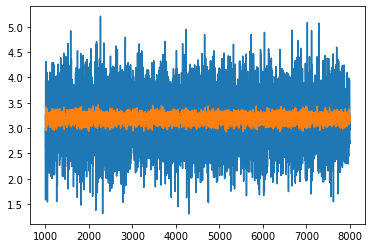

In [21]:
start = 1000
num = 8000
plt.plot(np.linspace(start,num,num-start), r[start:num] )
plt.plot(np.linspace(start,num,num-start), a[start:num] )
#plt.scatter(np.linspace(start,num,num-start), a[start:num])


(array([  5.,   6.,  10.,  28.,  30.,  52.,  70., 120., 149., 256., 319.,
        355., 391., 442., 507., 464., 458., 481., 471., 431., 394., 353.,
        294., 260., 194., 147., 115.,  69.,  51.,  33.,  18.,  11.,   7.,
          5.,   4.]),
 array([2.92647965, 2.94164187, 2.9568041 , 2.97196632, 2.98712855,
        3.00229077, 3.017453  , 3.03261522, 3.04777745, 3.06293967,
        3.0781019 , 3.09326412, 3.10842634, 3.12358857, 3.13875079,
        3.15391302, 3.16907524, 3.18423747, 3.19939969, 3.21456192,
        3.22972414, 3.24488637, 3.26004859, 3.27521082, 3.29037304,
        3.30553526, 3.32069749, 3.33585971, 3.35102194, 3.36618416,
        3.38134639, 3.39650861, 3.41167084, 3.42683306, 3.44199529,
        3.45715751]),
 <BarContainer object of 35 artists>)

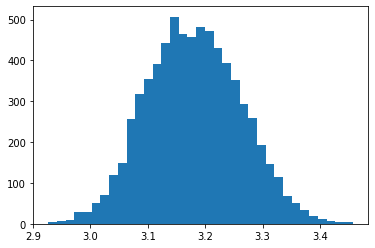

In [22]:
plt.hist(a[start:num], bins=35)

In [96]:
post = [x + y for x in accepted[:,0] and y in accepted[:,1]]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [23]:
post = list(map(lambda x: x[0] + x[1], accepted))

In [ ]:
post

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.900e+01, 4.730e+02,
        2.220e+03, 3.144e+03, 2.246e+03, 6.420e+02, 5.800e+01]),
 array([10.63164571, 10.71206177, 10.79247784, 10.8728939 , 10.95330997,
        11.03372604, 11.1141421 , 11.19455817, 11.27497424, 11.3553903 ,
        11.43580637, 11.51622243, 11.5966385 , 11.67705457, 11.75747063,
        11.8378867 , 11.91830276, 11.99871883, 12.0791349 , 12.15955096,
        12.23996703, 12.32038309, 12.40079916, 12.48121523, 12.56163129,
        12.64204736, 12.72246342, 12.80287949, 12.88329556, 12.96371162,
        13.04412769, 13.12454376, 13.20495982, 13.28537589, 13.36579195,
        13.44620802]),
 <BarContainer object of 35 art

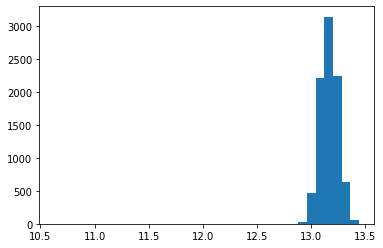

In [24]:
plt.hist(post, bins=35)

## Sunspot example

In [28]:
import math
import scipy
import scipy.stats
import pandas as pd

In [37]:
data_ss = pd.read_csv("Catalogue_B.csv", delimiter=';')

In [41]:
data_ss.iloc[:, 4]

0       42.2
1       42.2
2       42.2
3       42.2
4       42.2
        ... 
1752     4.0
1753     4.0
1754     4.0
1755     4.0
1756     4.0
Name: 42.2, Length: 1757, dtype: float64

(array([182., 220., 162.,  74.,  70.,  83.,  87.,  70.,  71.,  91.,  63.,
         73.,  61.,  79.,  40.,  49.,  36.,  42.,  31.,  26.,  27.,  18.,
         19.,  25.,   8.,   9.,  21.,   5.,   3.,  12.]),
 array([  0.2 ,   4.83,   9.46,  14.09,  18.72,  23.35,  27.98,  32.61,
         37.24,  41.87,  46.5 ,  51.13,  55.76,  60.39,  65.02,  69.65,
         74.28,  78.91,  83.54,  88.17,  92.8 ,  97.43, 102.06, 106.69,
        111.32, 115.95, 120.58, 125.21, 129.84, 134.47, 139.1 ]),
 <BarContainer object of 30 artists>)

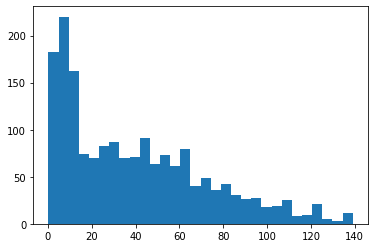

In [43]:
plt.hist(data_ss.iloc[:, 4], bins=30)

In [2]:
transition_model = lambda x: np.random.normal(x, [0.05, 5], (2,))

In [13]:
transition_model(1)

array([ 1.01647169, -6.56520867])

In [16]:
math.gamma(0.4)

2.2181595437576878

In [55]:
# log likelihood of observed data given specified pdf (or other way around)
# log likelihood
np.sum(np.log(scipy.stats.gamma(a=1.12, scale=1, loc=0).pdf(data_ss.iloc[:, 4]))) 

-69075.68108162285